> **Press SHIFT+TAB to toggle options in Jupyter Notebook!!!** 

# Week 5: Networks 1


*Wednesday, March 5th, 2019*

A network is a way to represent a system of things that interact or are interrelated in some fashion. It could just be your facebook network, that's obvious, but a network can also represent the interaction patterns of proteins in the human body, who votes what on whose bill in the US Senate, the mutually attractive forces between galaxies in the universe or just about anything else that you can possibly imagine. This week we will get started on some of the fundamental concepts, and then look closer at some Facebook data. In the exercises today you will:

* Get warmed up to thinking about systems as networks
* Learn to use the `NetworkX` library
* Explore a Facebook network

**Questions**: Outside of class, use [issue on GitHub](https://github.com/abjer/tsds/issues) for asking questions.

## Imports

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import networkx as nx           # pip install networkx
import pandas as pd
from collections import Counter
from netwulf import visualize   # pip install netwulf

## Exercises

### Part 0: Networks

Questions for chapter 1 and 2 of [Network Science](http://barabasi.com/networksciencebook/).

> **Ex. 5.0.1**: List three different real networks and state the nodes and links for each of them.

Network        | Nodes               | Links                   
 ---            | ---                 | --- 
Magteliten      | Persons             | Connections             
Citations       | Papers              | (In-directed) citations 
Football market | Clubs (and players) | Transfers between clubs

> **Ex. 5.0.2**: What networks are you personally most interested in. Address the following questions:
>   * What are its nodes and links? 
>   * How large is it? 
>   * Can be mapped out? 
>   * Why do you care about it? 

'Magteliten', translated into The Danish Elite Network.
* See above.
* Size depends on the threshold criteria.
* It is mapped already and [available at GitHub](https://github.com/antongrau/soc.elite), using R however.
* It had raised a lot of relevant debate and awareness.

> **Ex. 5.0.3**: In your view what would be the area where network science could have the biggest impact in the next decade? Explain your answer - and base it on the text in the book. 

Within the field of social science there is a lot of knowledge and importance hidden in formal or informal networks. Examples could be the influence patterns of elites wrt. the political and societal power or within an organisation, that is, Albert-Lásló Barabási [mentions](http://networksciencebook.com/chapter/1/#scientific-impact) companies like Maven 7, Activate Networks or Orgnet that already have their whole business concept centered around the latter.

There could as well be a hidden potential in studying network effects regarding social programmes, e.g. how a social network can improve your chance of getting a job.

> **Ex. 5.0.4**: Section 2.5 states that real networks are sparse. Can you think of a real network where each node has *many* connections? Is that network still sparse? If yes, can you explain why?

A complete graph is a network in which all nodes are linked with each of the other nodes, popularily called a clique. In contrast most networks, especially bigger networks are sparse as most nodes will have few connections only or be a part of one of many clusters.  As an example take an illustration of the The Danish Elite Network below.

This is the reason that when it comes to computation it is preferably to store the network as a list of connections rather than store the whole adjacency matric which for the most contains a whole lot of zeroes.
![img](https://magtelite.dk/wp-content/uploads/2016/06/index.png)

### Part 1: The `NetworkX` library

`NetworkX` is the Python library we will be using for working with networks. It should come installed with your Anaconda distribution, but you wont know how to use it yet. The best way to get familiar is to work through a tutorial. That's what the following exercises are about.

> **Ex. 5.1.1**: Go to the `NetworkX` project's [tutorial page](https://networkx.github.io/documentation/stable/tutorial/index.html). Read the first few sections about nodes, edges and attributes. Write an example below where you create a graph, `G`, and then:
1. add some nodes and edges to,
2. print its nodes and edges
3. delete a node, and
4. plot it.

In [52]:
def opt(color):
    options = {
        'with_labels': True,
        'font_weight': 'bold',
        'node_color': color,
        'node_size': 300,
        'width': 1,
    }
    return options

def plot(G):
    plt.clf()
    plt.subplot(121)
    nx.draw(G, **opt('r'))
    plt.subplot(122)
    nx.draw_shell(G, nlist=[range(5, 10), range(5)], **opt('b'))
    plt.show()

Nodes: [1, 2, 4, 3, 5] 
Edges: [(1, 2), (1, 4), (1, 3), (2, 4), (3, 5)]


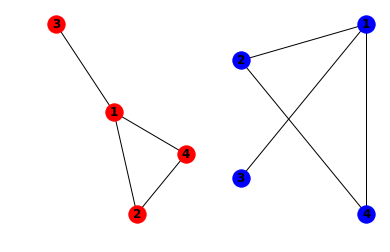

In [53]:
G = nx.Graph([(1,2), (1,4), (1,3), (2,4), (3,5)])
# G.add_edges_from([(1,2), (1,4), (1,3), (2,4), (3,5)])
print('Nodes:', list(G.nodes), '\nEdges:', list(G.edges))
G.remove_node(5)
plot(G)

> **Ex. 5.1.2**: `NetworkX` has lots of functions to generate synthetic networks. One of the most famous types of synthetic networks is called an Erdős–Rényi (ER) network.
1. Describe what an ER network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating an ER network. Create one with $N=100$ nodes and probability of edge creation $p=0.1$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created ER graph.
    * A node's *degree* is the number of other nodes it is connected to.
    * The *degree distribution* is a histogram which shows the distribution of node degrees.

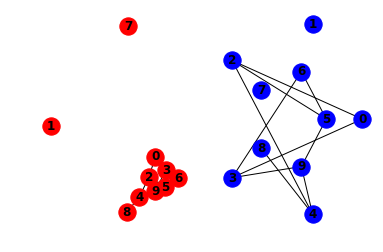

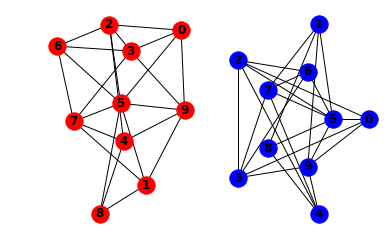

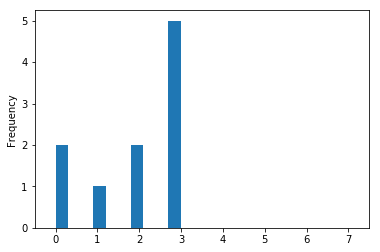

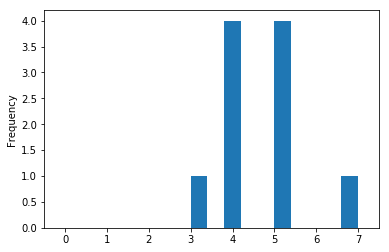

In [12]:
# An Erdős–Rényi is a binomial network where links are assigned by random
# given a probability rate p
p_G = 0.2
p_F = 0.5
G = nx.gnp_random_graph(n=10, p=p_G, seed=69, directed=False)
F = nx.gnp_random_graph(n=10, p=p_F, seed=69, directed=False)
plot(G)
plot(F)
for i in [G, F]:
    fig, ax = plt.subplots(figsize = (6, 4))
    ax.set_xlim([-0.5,7.5])
    degree_i = pd.DataFrame(i.degree()).iloc[:,1]
    degree_i.plot.hist()
    plt.show()

> **Ex. 4.1.3**: Another very famous type of synthetic network is the Barabási–Albert (BA) network.
1. Describe what a BA network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating a BA network. Create one with $N=100$ nodes and number of new edges from each new node $m=2$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created BA graph.
5. Explain the main difference(s) you observe, when comparing to the ER network.
6. Are there other measures we could have used to describe the ER and BA networks further?

In [1]:
from operator import itemgetter

class ba_model(object):
    ''' Creates a Barabási–Albert (BA) network.
        Optional: Set the size N and number of new edges from each new node m.
                  as well as the color and node size
    '''

    def __init__(self, N=100, m=2, color='g', node_size=100):
        self.N = N
        self.m = m
        self.c = color
        self.s = node_size
        self.G = nx.barabasi_albert_graph(self.N, self.m)

    def graph(self):
        return self.G

    def opt(self):
        options = {
            'with_labels': False,
            #'font_weight': 'bold',
            'node_color': self.c,
            'node_size': self.s,
            'width': 1,
        }
        return options
    
    def plot(self):
        plt.subplots(figsize = (10, 8))
        nx.draw(self.G, **self.opt())
        plt.show()
        
    def shell(self):
        plt.subplots(figsize = (10, 8))
        nx.draw_shell(self.G, **self.opt())
        plt.show()

    def ego(self):
        """ Thanks: Drew Conway (drew.conway@nyu.edu)
            Drew's graph is modified to contain all of the original nodes.
        """
        plt.subplots(figsize = (10, 8))
        # find node with largest degree
        node_and_degree = self.G.degree()
        (largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]
        # Draw graph
        pos = nx.spring_layout(self.G)
        nx.draw(self.G, pos, node_color=self.c, node_size=self.s, with_labels=False)
        # Draw ego as large and red
        nx.draw_networkx_nodes(self.G, pos, nodelist=[largest_hub], node_size=300, node_color='r')
        plt.show()

    def hub(self):
        """Thanks: Drew Conway (drew.conway@nyu.edu)
        """
        plt.subplots(figsize = (10, 8))
        # find node with largest degree
        node_and_degree = self.G.degree()
        (largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]
        # Create ego graph of main hub
        hub_ego = nx.ego_graph(self.G, largest_hub)
        # Draw graph
        pos = nx.spring_layout(hub_ego)
        nx.draw(hub_ego, pos, node_color=self.c, node_size=self.s, with_labels=False)
        # Draw ego as large and red
        nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], node_size=300, node_color='r')
        plt.show()

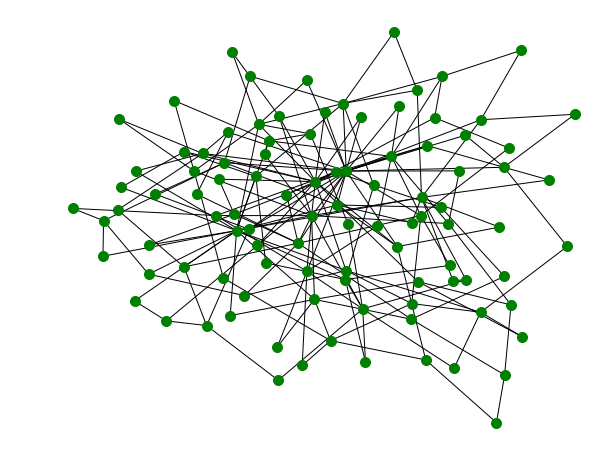

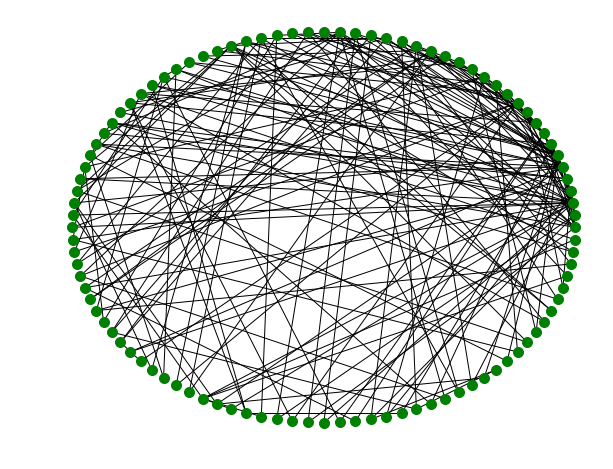

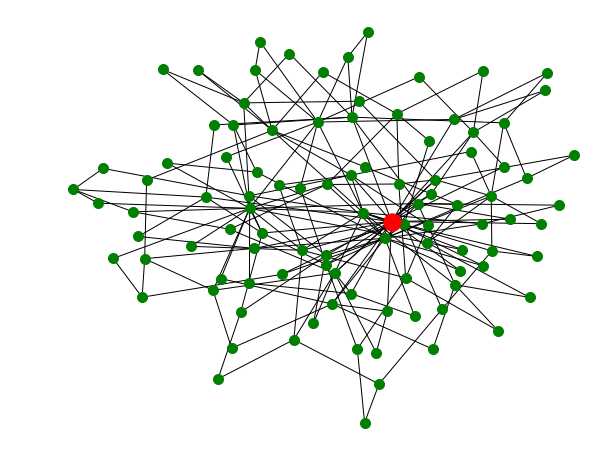

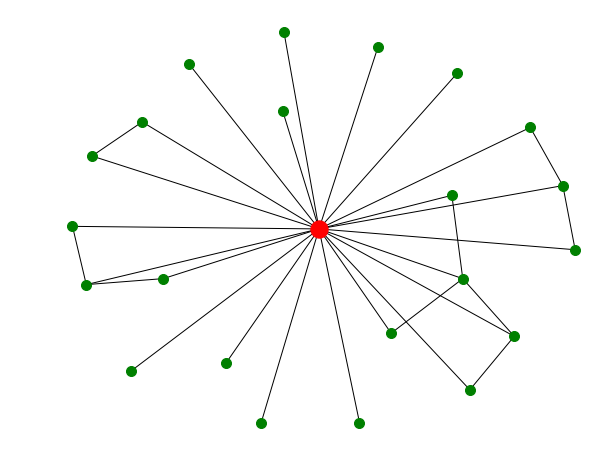

In [182]:
# "The BA model is an algorithm for generating random scale-free networks
# using a preferential attachment mechanism" (Wikipedia)
# i.e. nodes that are hubs have higher probability of having new nodes attached
ba = ba_model(100, 2, 'g')

ba.plot()
ba.shell()
ba.ego()
ba.hub()

### Part 2: Facebook network

Now that you know how to build a network in `NetworkX`, visualize it and plot some statistics, you are ready to analyze today's dataset. We will be using [this facebook dataset](http://socialnetworks.mpi-sws.org/data-wosn2009.html) collected by the researchers at the Max Planck Institute. Go ahead and download the list of wall posts. Put the file in the same directory as this notebook and load it like:

In [185]:
data = pd.read_csv(
    "facebook-wall.txt",
    delimiter="\t",
    header=None,
    names=['user1', 'user2', 'timestamp']
)

data.head(10)


,user1,user2,timestamp
0,28,28,1095135831
1,1015,1017,1097725406
2,959,959,1098387569
3,991,991,1098425204
4,1015,1017,1098489762
5,1015,1017,1098673897
6,3368,3368,1098755376
7,14752,14736,1099526971
8,1015,1017,1099602800
9,1531,1080,1099889279


As you can see this is a *temporal network* (in that edges are timestamped). Time is given in UNIX timestamps. Though there are ways to model such
a network in its entire complexity, we'll start simple and just take a slice of it out and treat that as a static
network. You can create a `nx.DiGraph` from a slice of time like:

In [188]:
def temporal(t0=7, t1=0):
    t0 = data.timestamp.max() - 86400 * t0  # Lower bound of time-slice (here: 7 days before last wall post)
    t1 = data.timestamp.max() - 86400 * t1  # Upper bound of time-slice
    
    # Subset of the pandas dataframe
    data_t = data.loc[data.timestamp.between(t0, t1)]

    # Count the number of times each link occurs and store that in a new 'weight' column
    data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')

    # Create a `nx.DiGraph` from this dataframe
    G_t = nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.DiGraph)
    
    return G_t

> **Ex: 5.2.1**: Convert the above sample code into a function where you can easily input `t0` and `t1` of the slice, and get a `nx.DiGraph` in return. Create the aggregated network for the last 365 days of the data. Print the number of nodes and edges.

In [192]:
G = temporal(365, 0)
print('Nodes:', G.number_of_nodes(), 
    '\nEdges:', G.number_of_edges())

Nodes: 44397 
Edges: 201632


> **Ex: 5.2.2**: Since it's a directed network, there are two degree distributions we can plot: one for the
in-degrees and another for the out-degrees. Plot them both in the same figure (remember to add a legend).
The distribution is very heavy-tailed, so you may want to log-scale both axes. Comment on the result. Does
it resemble any of the network models you know?
>
> *Hint: use `Counter` to count how many times each degree-value occurs and then scatter plot the degree-values
against counts. When you log-scale the axes, zero values cause trouble, so you should remove the data point for
degree 0.*

> **Ex: 5.2.3**: Using a histogram plot the distribution of (weighted) local clustering coefficients ([docs](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering)). Which distribution does it appear to follow?
>
> *Hint: figure out how to plot a histogram with logarithmic bins.*

We want to plot the network so we can visually get a feeling for how people are connected. `networkx`'s `nx.draw` method won't cut it here, it's too slow and has bad layout support for large networks, so instead we'll use `netwulf` ([docs](https://github.com/benmaier/netwulf)) to visualize networks in a browser-app I made (still in beta, bugs may occur). But even with this tool, the network of one year is still too big to make nice visualizations, so we have to reduce the number of links and nodes by some heuristic. This could for example be to threshold link weight to reduce the number of links, thresholding weighted node degree (or other relevant metrics).

> **Ex: 5.2.4**: Threshold the network by some meaningful heuristic so it has around 5000 nodes and 20000 edges. Then launch a visualization of it using `netwulf`, style the network so it looks nice and download (or screenshot) the figure and put it into the cell below. State explicitly what thresholds you apply and why you think they make sense. Comment on the result. Do you see anything interesting in this network or is it just a big hairball?
>
> *Hint: The longer you let the nodes **wiggle** the nicer the network will look.*